First 5 rows of data:
         Date   Open   High    Low  Close  Volume
0  2023-01-01  16500  16700  16400  16600   35000
1  2023-01-02  16600  16800  16500  16750   37000
2  2023-01-03  16750  16900  16650  16850   39000
3  2023-01-04  16850  17000  16750  16900   41000
4  2023-01-05  16900  17100  16800  17050   42000

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    38 non-null     object
 1   Open    38 non-null     int64 
 2   High    38 non-null     int64 
 3   Low     38 non-null     int64 
 4   Close   38 non-null     int64 
 5   Volume  38 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.9+ KB
None
Performing Grid Search for the best model...


<ipython-input-3-d5857ff8268b>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)



Best Parameters from Grid Search:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Model Evaluation:
Mean Squared Error (MSE): 1872.0
R^2 Score: 0.9792


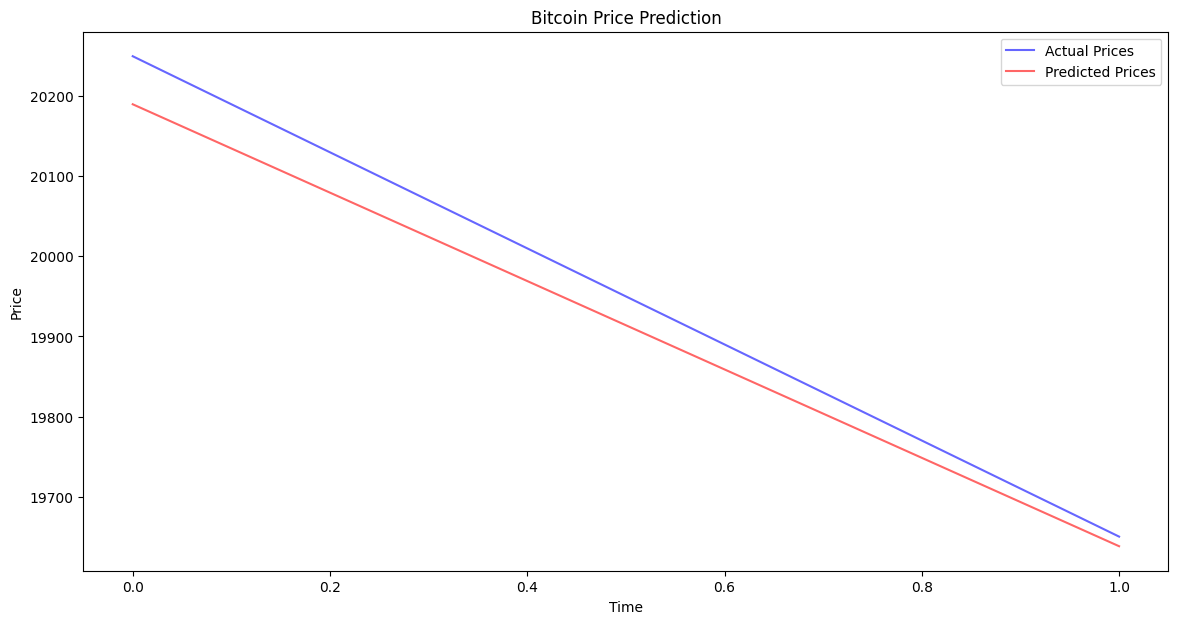

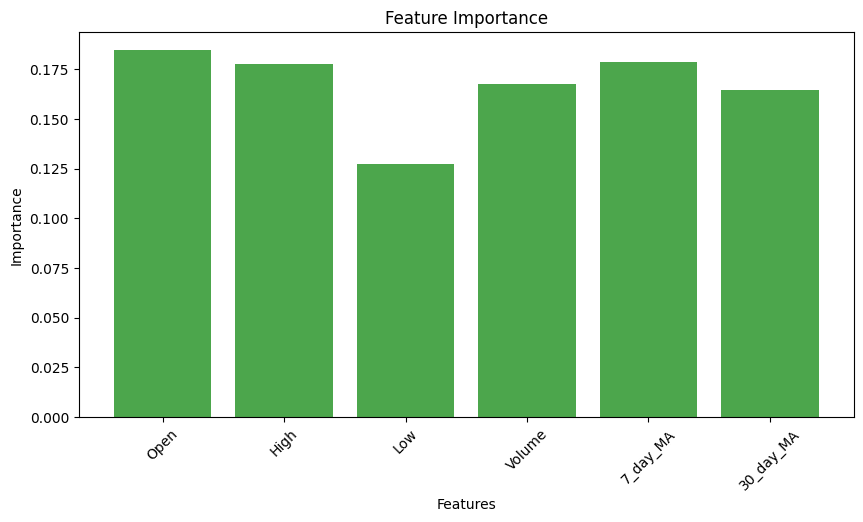

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the Bitcoin historical data
data = pd.read_csv('bitcoin_price.csv')  # Replace with your CSV file name

# Display the first few rows of the data and check for missing values
print("First 5 rows of data:")
print(data.head())
print("\nData Information:")
print(data.info())

# Handle missing values (if any)
data.fillna(method='ffill', inplace=True)

# Convert the 'Date' column to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Create new features (e.g., 7-day moving average, 30-day moving average)
data['7_day_MA'] = data['Close'].rolling(window=7).mean()
data['30_day_MA'] = data['Close'].rolling(window=30).mean()

# Drop rows with NaN values created by moving averages
data.dropna(inplace=True)

# Select features and target variable
features = ['Open', 'High', 'Low', 'Volume', '7_day_MA', '30_day_MA']
target = 'Close'

X = data[features]
y = data[target]

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a Random Forest model and use GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Performing Grid Search for the best model...")
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='r2')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_
print("\nBest Parameters from Grid Search:")
print(grid_search.best_params_)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Plot actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue', alpha=0.6)
plt.plot(y_pred, label='Predicted Prices', color='red', alpha=0.6)
plt.legend()
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

# Feature Importance
feature_importance = best_model.feature_importances_
feature_names = features

plt.figure(figsize=(10, 5))
plt.bar(feature_names, feature_importance, color='green', alpha=0.7)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()